# Census Income Project

## Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). 

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Let's Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### let's load the dataset

In [12]:
df = pd.read_csv("Census Income Project.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Dataset has 32560 rows and 15 columns including one target column.

Dataset is containing information about certain countries population and their respective attributes like age, education, marital status, working hours, relation between people and their losses and gain etc.

In [13]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [14]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns in the dataset

In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 columns of integer dtypes and rest 9 columns are of object dtypes. 

There are no null values in the dataset. 

Income is the target column which is also object dtype with binary classification.

In [17]:
# Checking missing value
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values present in the dataset

## Exploratory Data Analysis

In [18]:
#for Numerical Columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Following observations are made in this step –

The age column has a range of 17 to 90.

The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

The education number has a range of 1 to 16

The capital gain starts from 0 and ends at 99999

The capital loss starts at 0 and ends at 4356

Hours per week range between 1–99.

There are outliers expected in Capital_gain column as the values till 75% are 0. Same is the case with capital_loss as well.

The fnlwgt column also has a huge difference between 75% values and the max value. So, There is a chance of getting outliers here.

Further, we have a look at our dataset and explore the data in various columns, one by one –

In [19]:
# For all categorical variables
df.select_dtypes(include="object").describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


The total count of Private in Workclass is maximum and there are total 9 unique values in Workclass.

In Education, HS-grad has highest frequency and white people count is high. 

There are more number of males than females. We see 42 native countries but united state data has more frequency. <=50K is more than >50K.

### Let's check the value count of Categorical columns

In [20]:
categorical_col = df.select_dtypes(include ="object")

In [21]:
for i in categorical_col:
    print(i)
    print(categorical_col[i].value_counts())
    print('\n')

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


Occupation
 Prof-specialty   

Here We can observe that we have '?' for some values in Workclass, Occupation and Native_country columns.

which is a sort of missing val, it wasnt got identify during the missing value analysis. let's replace them with Nan value and impute them.

Also the target column has more number people having '<=50k' income which is around 76% of total num of people and only 24% of people has income '>50'. 

So there is imbalance in data. So we will apply SMOTE analysis at later stage .

In [22]:
# replaceing ? with nan value
df["Workclass"] = df["Workclass"].str.strip().replace({"?" : np.nan})
df["Occupation"] = df["Occupation"].str.strip().replace({"?" : np.nan})
df["Native_country"] = df["Native_country"].str.strip().replace({"?" : np.nan})

In [23]:
#Again Checking for null values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [24]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Now all the three columns are which were having "?" as values are showing null values. So we will remove the null values using simple imputer.

### Treating null values using imputation Techniques.

In [25]:
df.groupby("Workclass")["Age"].mean()

Workclass
Federal-gov         42.590625
Local-gov           41.751075
Never-worked        20.571429
Private             36.797585
Self-emp-inc        46.017025
Self-emp-not-inc    44.969697
State-gov           39.436392
Without-pay         47.785714
Name: Age, dtype: float64

We can see that never work category comes under 20. Without pay column has the older age people in the age column. we will impute the work place accordingly.

In [26]:
def impute_workclass(x):
    workclass = x[0]
    age = x[1]
    
    if pd.isnull(workclass):
        if age < 20.571429:
            return "Never-worked"
        elif age >20.571429  and age <= 36.797585:
            return "Private"
        elif age >36.797585  and age <= 39.436392:
            return "State-gov"
        elif age >39.436392  and age <= 41.751075:
            return "Local-gov"
        elif age >41.751075 and age <=42.590625:
            return  "Federal-gov"
        elif age > 42.590625 and age <=44.969697:
            return "Self-emp-not-inc"
        elif age > 44.969697 and age <= 46.017025:
            return "Self-emp-inc"
        elif age > 46.017025:
            return "Without-pay"
    else:
        return workclass

We see that all the workclass are present in all the age bucket. 
so we will impute them with age mean.

In [27]:
df["Workclass"] =df[["Workclass","Age"]].apply(impute_workclass,axis =1)

In [28]:
df.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [29]:
df['Workclass'].value_counts()

Private             23279
Self-emp-not-inc     2564
Local-gov            2128
State-gov            1335
Self-emp-inc         1138
Federal-gov           975
Without-pay           750
Never-worked          391
Name: Workclass, dtype: int64

In [30]:
df.groupby("Occupation")["Age"].mean()

Occupation
Adm-clerical         36.963916
Armed-Forces         30.222222
Craft-repair         39.031471
Exec-managerial      42.169208
Farming-fishing      41.211268
Handlers-cleaners    32.165693
Machine-op-inspct    37.715285
Other-service        34.949621
Priv-house-serv      41.724832
Prof-specialty       40.517633
Protective-serv      38.953775
Sales                37.353973
Tech-support         37.022629
Transport-moving     40.197871
Name: Age, dtype: float64

Average age of all the occupations are very close. Hence, we will impute it with mode(most frequent) value.

In [31]:
# Replacing NAN value of Occupation and Native_country with most_frequent values
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy="most_frequent")
df["Occupation"]= imp.fit_transform(df["Occupation"].values.reshape(-1,1))
df["Native_country"]= imp.fit_transform(df["Native_country"].values.reshape(-1,1))

In [32]:
#Again checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Hence There are no null values in the dataset

## Data Visualisation

### Univariate Analysis

### Categorical Column Visualisation

<AxesSubplot:xlabel='Income', ylabel='count'>

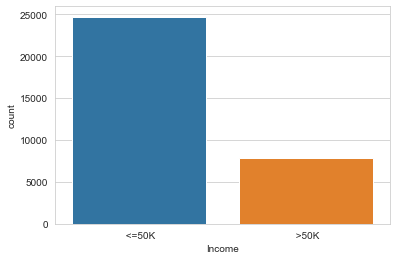

In [33]:
sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

<=50K is higher than >50K, it resembles that imbalance dataset we will treat them later on.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Self-emp-not-inc'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'State-gov'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Without-pay'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Never-worked')])

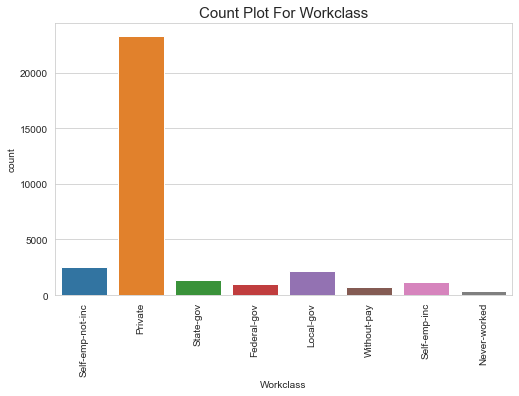

In [34]:
# Countplot for workclass column
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
sns.countplot(df['Workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

Most of the population are from Private Worlclass

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

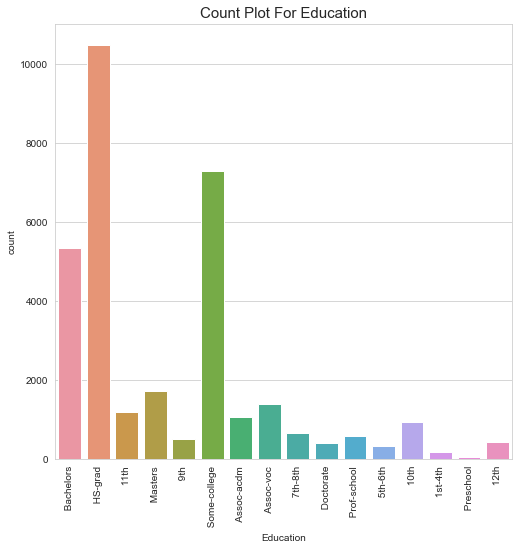

In [36]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(df['Education'])
plt.title("Count Plot For Education", fontsize = 15)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

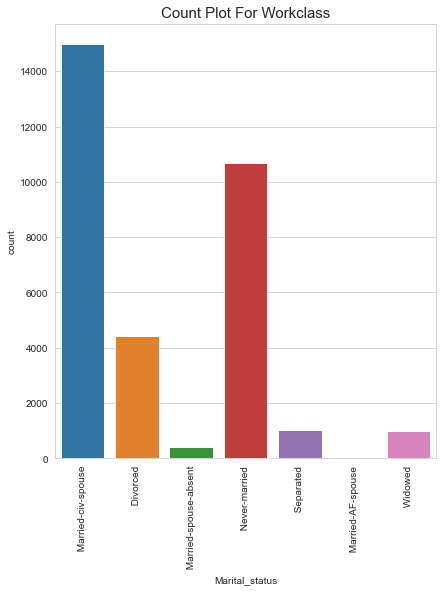

In [37]:
# Countplot for workclass column
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sns.countplot(df['Marital_status'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

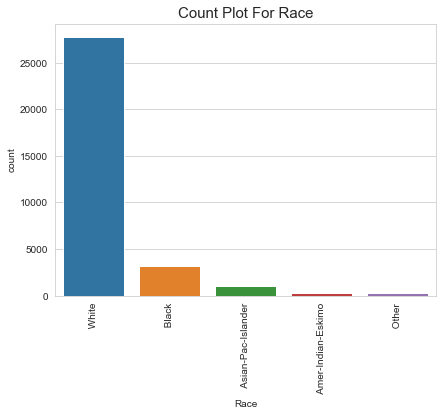

In [38]:
# Countplot for race column
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['Race'])
plt.title("Count Plot For Race", fontsize = 15)
plt.xticks(rotation=90)

The Race column has 5 different categories. Highest number of people have race as ‘White’ (significantly high numbers).

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

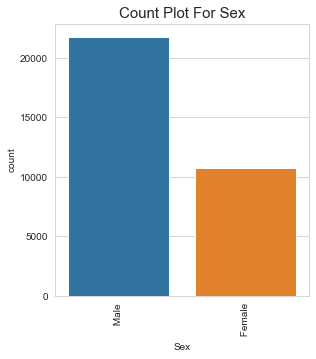

In [39]:
# Countplot for sex column
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(df['Sex'])
plt.title("Count Plot For Sex", fontsize = 15)
plt.xticks(rotation=90)

The ‘Sex’ column has 2 categories — Male and Female, where the number of males are almost double to number of females.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'South'),
  Text(6, 0, 'Puerto-Rico'),
  Text(7, 0, 'Honduras'),
  Text(8, 0, 'England'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Iran'),
  Text(12, 0, 'Philippines'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Cambodia'),
  Text(17, 0, 'Thailand'),
  Text(18, 0, 'Ecuador'),
  Text(19, 0, 'Laos'),
  Text(20, 0, 'Taiwan'),
  Text(21, 0, 'Haiti'),
  Text(22, 0, 'Portugal'),
  Text(23, 0, 'Dominican-Republic'),
  Text(24, 0, 'El-Salvador'),
  Text(25, 0, 'France'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'Yugoslavia'),
  Text(30, 0, 'Peru'),
  Te

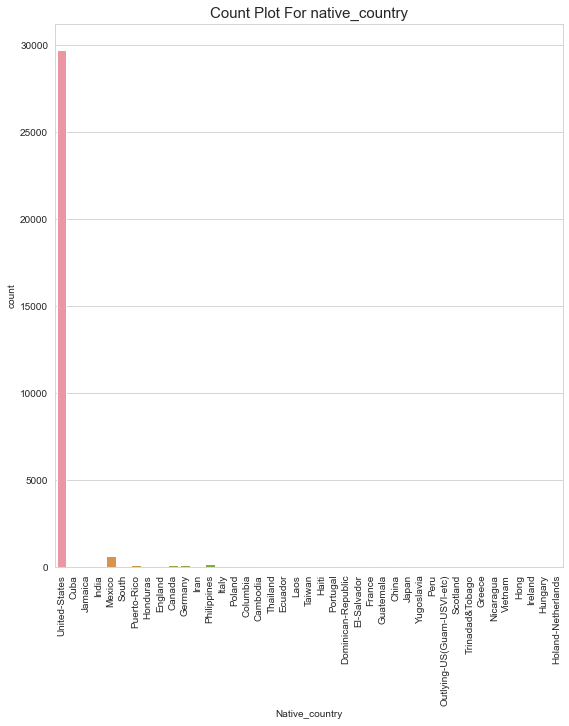

In [41]:
# Countplot for sex column
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sns.countplot(df['Native_country'])
plt.title("Count Plot For native_country", fontsize = 15)
plt.xticks(rotation=90)

### Numerical Columns visualization

In [42]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


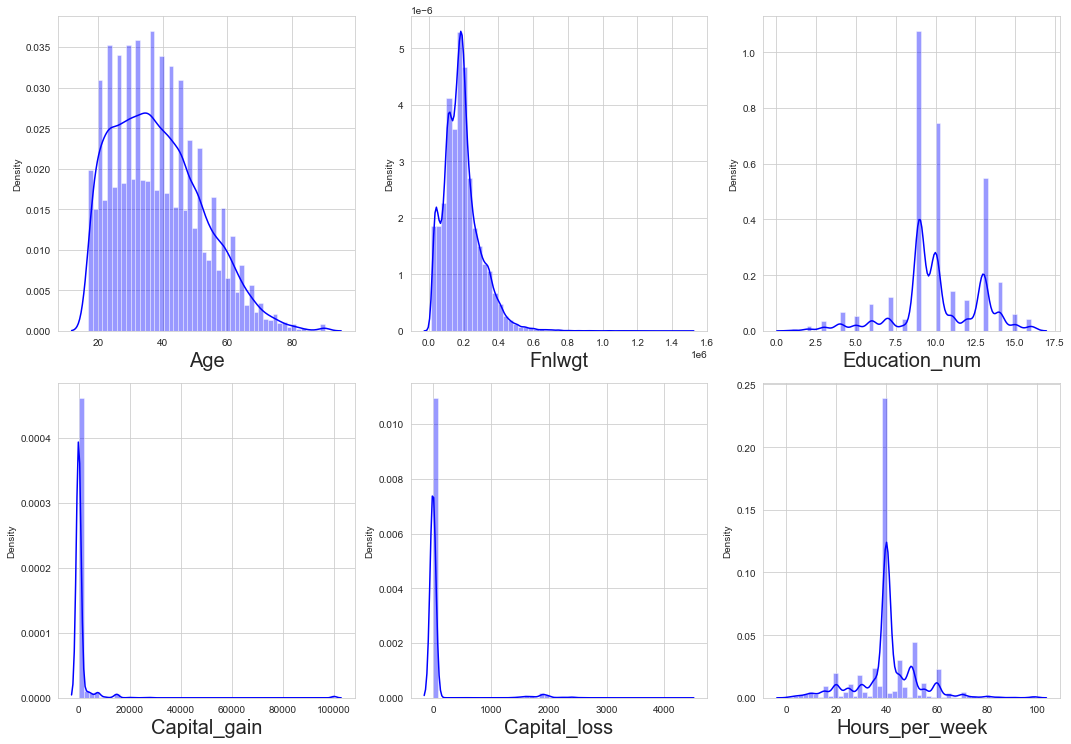

In [43]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observations:

1. The data in age column has a minimum value 17 and max value 90. We observe that our data is has right skewness, with majority of he ages falling in the 20–50. The count keeps on decreasing as the age increases.

2. ‘Capital_gain’ column is a numeric column, with majority of the values set as 0. The distribution plot for ‘Capital_gain’ column is highly right skewed.

3. The fnlwgt column has a minimum value of 12285 and maximum value of 1484705.

4. The ‘Capital_loss’ column also has majority of the values set as 0, similar to ‘Capital_gains’. The data is highly right skewed in this case as well.

5. The hours per week column has values scattered over a range of 1–99. The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak.

6. The education number has a range of 1 to 16

## Bivariate Analysis

Text(0.5, 1.0, 'Count Plot for Education Per Class')

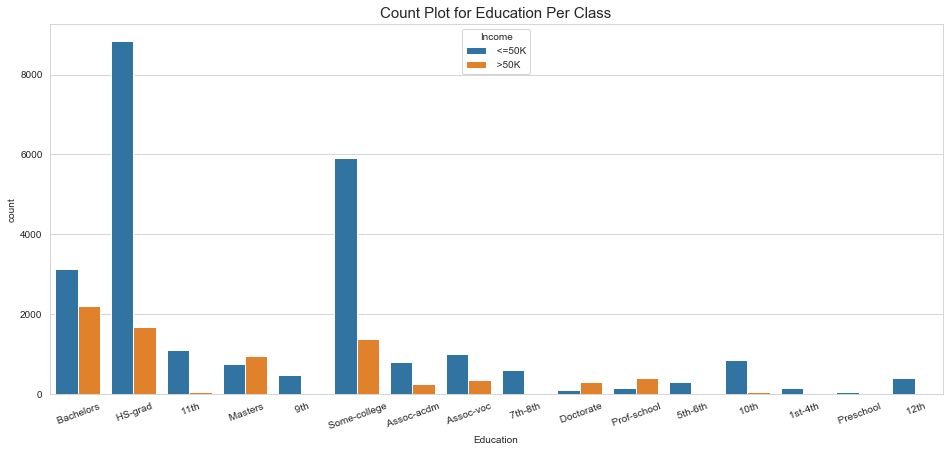

In [44]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='Education', data=df, hue='Income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

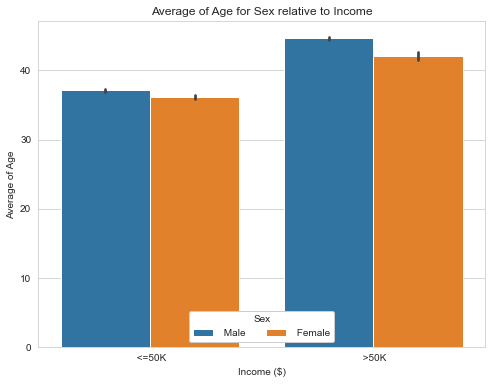

In [45]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. 

And also we see that the male category has a little bit higher age average than the female category.

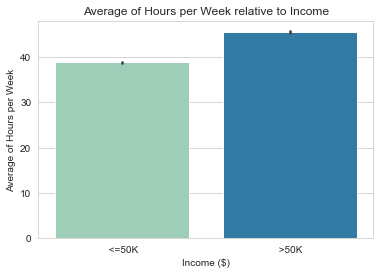

In [46]:
# Bar Chart 
plt.figure(figsize=[6,4])
sns.barplot(data=df, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

Text(0.5, 1.0, 'Countplot for Age Per Class')

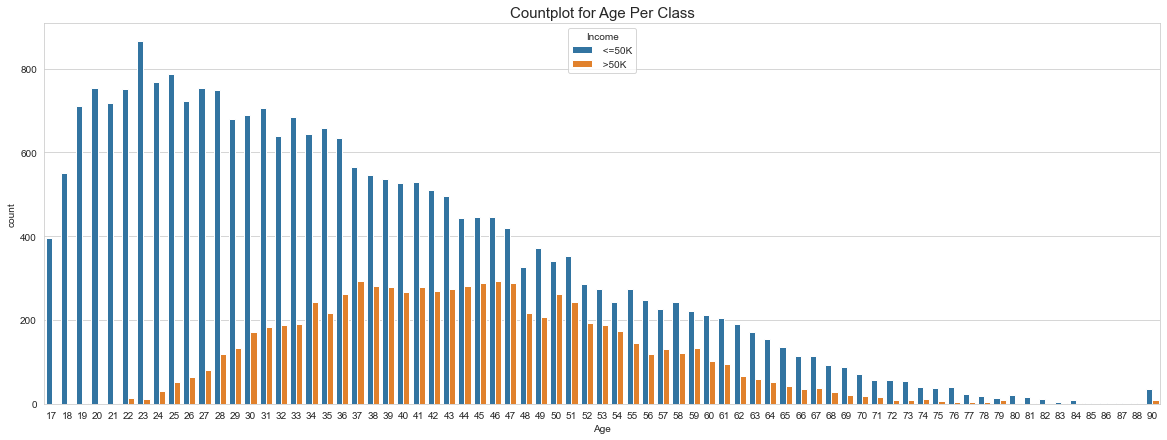

In [47]:
# Count Plot For Gender Per Class
plt.figure(figsize=(20, 7))
sns.countplot(x='Age' ,data=df, hue='Income')
plt.title("Countplot for Age Per Class", fontsize = 15)

Text(0.5, 1.0, 'Countplot for Age Per Class')

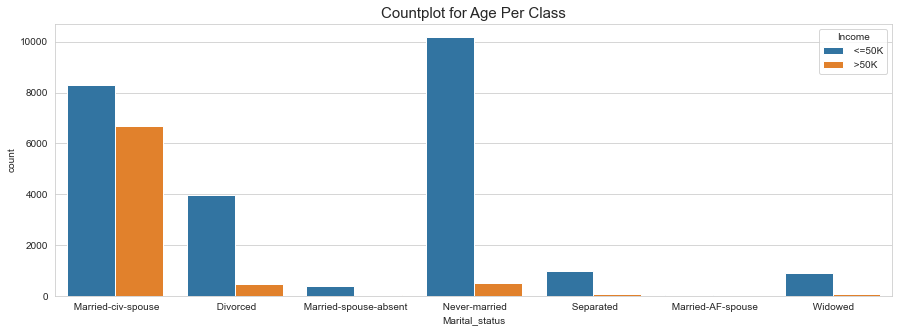

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x='Marital_status' ,data=df, hue='Income')
plt.title("Countplot for Age Per Class", fontsize = 15)

Text(0.5, 1.0, 'Countplot for race Per Class')

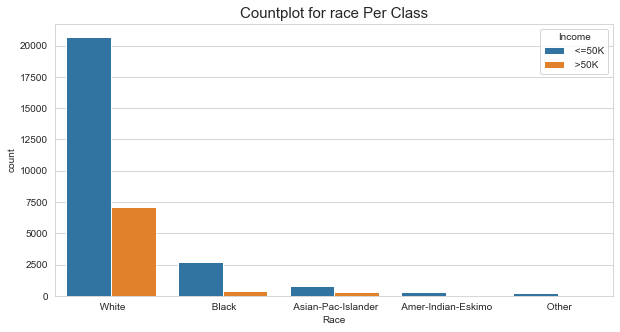

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='Race' ,data=df, hue='Income')
plt.title("Countplot for race Per Class", fontsize = 15)

Text(0.5, 1.0, 'Countplot for Workclass Per Income')

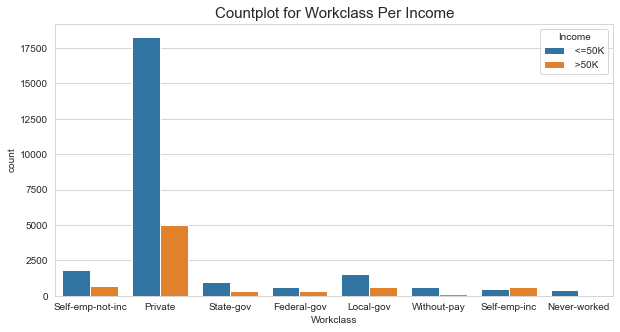

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass' ,data=df, hue='Income')
plt.title("Countplot for Workclass Per Income", fontsize = 15)

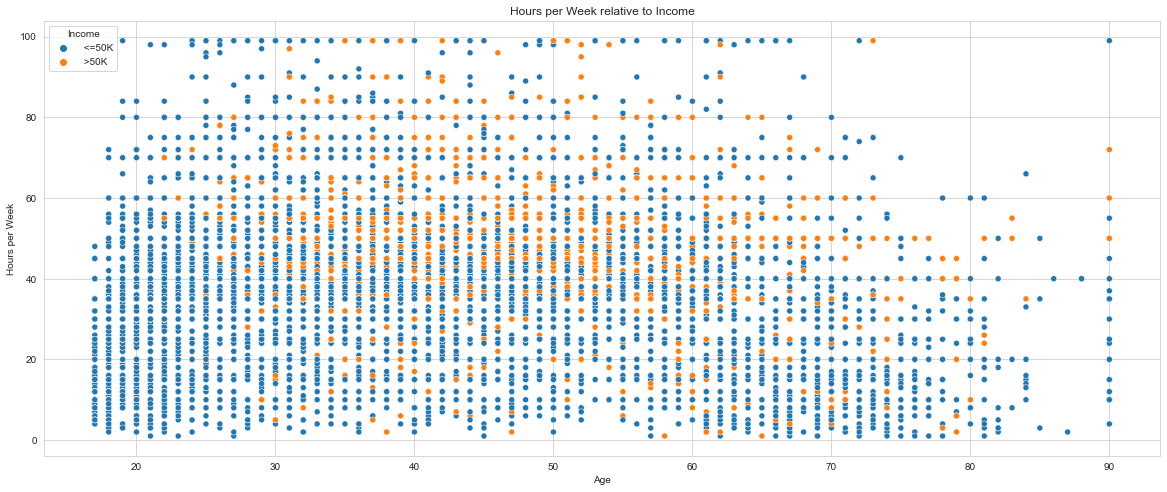

In [51]:
# Bar Chart 
plt.figure(figsize=[20,8])
sns.scatterplot(data=df, x='Age', y='Hours_per_week', hue='Income')
plt.title('Hours per Week relative to Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week');

Looking at the graphs above, we make the following conclusions –

1. A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’ with education level as 'HS grad'.

2. Males have a higher chance of earning more than 50K, when compared with females.

3. The income grows directly with the average of work hours per week.

4. People with education level as ‘HS grad' have higher ratios of >50K earning, than <=50K. 

5. Bachelors degree also has around 10:7 ratio of <=50K : >50K.

6. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.

7. We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable.

8. From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 40 hours_per_week to earn >50K.

## Multivariate Analysis

In [52]:
# Converting categorical column to numerical column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16527,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,3,8079,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,3,7882,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,3,12880,11,8,4,0,3,4,1,0,0,19,38,0


### Let's Check the Correlation

In [53]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.180831,-0.078466,-0.010499,0.036547,-0.266433,0.001742,-0.263783,0.028751,0.088863,0.125916,0.065058,0.069123,-0.000266,0.234136
Workclass,0.180831,1.000000,-0.033557,-0.010388,-0.016576,-0.022080,0.052274,-0.081544,0.044265,0.067311,0.020419,0.005995,-0.018439,0.002991,0.000771
Fnlwgt,-0.078466,-0.033557,1.000000,-0.027082,-0.042806,0.030163,0.001282,0.007005,-0.008964,0.025787,-0.004562,-0.009912,-0.019168,-0.067040,-0.010573
Education,-0.010499,-0.010388,-0.027082,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.031392,0.016111,0.056295,0.076062,0.079311
Education_num,0.036547,-0.016576,-0.042806,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.154387,0.084175,0.150098,0.088887,0.335182
Marital_status,-0.266433,-0.022080,0.030163,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.075162,-0.035235,-0.192647,-0.021285,-0.199295
Occupation,0.001742,0.052274,0.001282,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.012963,0.008955,-0.014158,-0.002205,0.034599
Relationship,-0.263783,-0.081544,0.007005,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.093141,-0.064286,-0.251353,-0.010710,-0.250924
Race,0.028751,0.044265,-0.008964,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.024951,0.019366,0.042318,0.116526,0.071853
Sex,0.088863,0.067311,0.025787,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.077573,0.049549,0.231357,0.002055,0.215995


<AxesSubplot:>

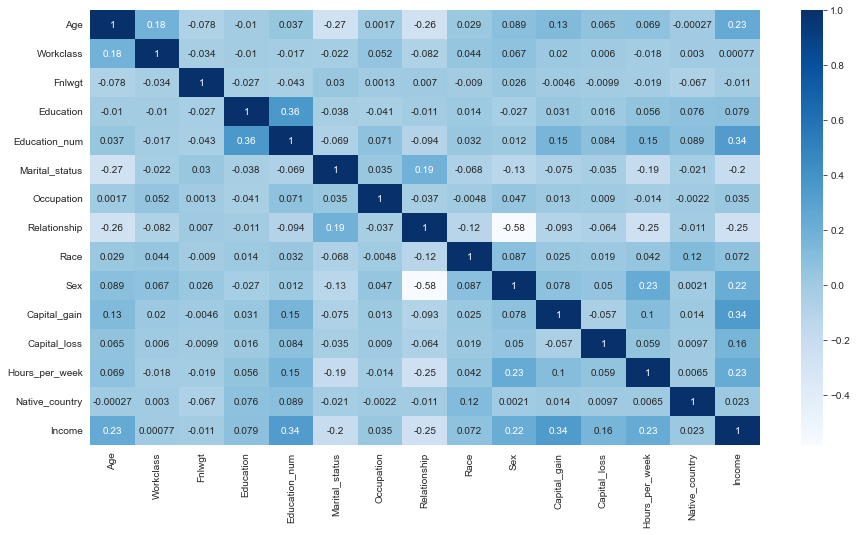

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

By Observing the heatmap we can conclude that:

Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. 

The correlations are moderate.

Also it is negatively correlated with Fnlwgt and marital status.

There is no multicollinearity observed among the columns.

We will drop the fnlwgt as it sample weight which assigns to the data and it is also not contributing to target variable.

In [56]:
df.drop("Fnlwgt",axis = 1, inplace = True)
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,1,6,2,5,0,2,1,0,0,39,38,0
3,11,3,9,12,2,9,5,2,0,0,0,39,4,0
4,20,3,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,3,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,3,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,3,11,8,4,0,3,4,1,0,0,19,38,0


### Let's Check the Outliers by capping with upper and lower bound

In [57]:
def outlier_imoute_with_IQR(x, variable):
    q1 = x[variable].quantile(.25)
    q3 = x[variable].quantile(.75)
    IQR = q3-q1

    upper_bound = q3 + (1.5*IQR)
    lower_bound = q1 - (1.5*IQR)
    
    x[variable] = np.where(x[variable] > upper_bound,upper_bound, np.where(x[variable] < lower_bound, lower_bound , x[variable]))

In [58]:
def outlier_imoute_with_Mean_std(x, variable):
    Mean = x[variable].mean()
    STD = x[variable].std()
    
    lower_bound = Mean - (3*STD)
    upper_bound = Mean + (3*STD)
    
    x[variable] = np.where(x[variable] > upper_bound,upper_bound, np.where(x[variable] < lower_bound, lower_bound , x[variable]))

In [59]:
outlier_imoute_with_IQR(df,"Age")
outlier_imoute_with_IQR(df,"Education_num")
outlier_imoute_with_Mean_std(df,"Capital_gain")
outlier_imoute_with_Mean_std(df,"Capital_loss")
outlier_imoute_with_IQR(df,"Hours_per_week")

### Let's Check the Skewness

In [60]:
df.skew()

Age               0.513883
Workclass         0.522585
Education        -0.934063
Education_num    -0.034043
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.329453
Capital_loss      4.513343
Hours_per_week    0.438274
Native_country   -4.243083
Income            1.212383
dtype: float64

"Education","Relationship",'Race','Sex','Capital_gain','Capital_loss','Native_country' Have Skewness morethan +0.5 and -0.5

### Removing skewness using yeo-johnson method

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
skew = ["Education","Relationship",'Race','Sex','Capital_gain','Capital_loss','Native_country']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [63]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,Education,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country
0,-0.477012,-1.094635,0.412893,0.703087,-0.301363,-0.221213,0.294407
1,0.090482,0.134511,0.412893,0.703087,-0.301363,-0.221213,0.294407
2,-2.067600,-1.094635,-2.431920,0.703087,-0.301363,-0.221213,0.294407
3,-0.477012,1.549018,-2.431920,-1.422298,-0.301363,-0.221213,-3.411817
4,0.395133,1.549018,0.412893,-1.422298,-0.301363,-0.221213,0.294407


In [64]:
df.skew()


Age               0.513883
Workclass         0.522585
Education        -0.309431
Education_num    -0.034043
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.017182
Capital_loss      4.299512
Hours_per_week    0.438274
Native_country   -2.981838
Income            1.212383
dtype: float64

Let's proceed to the further steps

In [65]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [66]:
print(x.shape,'\t',y.shape)

(32560, 13) 	 (32560,)


In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

### Feature Scaling

In [68]:
sc = StandardScaler()

X = sc.fit_transform(df.drop("Income",axis =1))
y = df["Income"]
X

array([[ 0.84422402,  1.44285492, -0.47701209, ..., -0.22121319,
        -1.40657589,  0.29440711],
       [-0.04098439, -0.13838256,  0.09048172, ..., -0.22121319,
        -0.19435709,  0.29440711],
       [ 1.06552612, -0.13838256, -2.06759959, ..., -0.22121319,
        -0.19435709,  0.29440711],
       ...,
       [ 1.43436295, -0.13838256,  0.09048172, ..., -0.22121319,
        -0.19435709,  0.29440711],
       [-1.22126226, -0.13838256,  0.09048172, ..., -0.22121319,
        -1.40657589,  0.29440711],
       [ 0.99175875,  0.65223618,  0.09048172, ..., -0.22121319,
        -0.19435709,  0.29440711]])

### Let's Fix imbalanced dataset using SMOTE analysis

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

In [70]:
y_sm.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

### Let's Find the Best Random State

In [71]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.7816208198489751 on Random State 68


### Let's Create train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.30,random_state=maxRS)

In [73]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(34606, 13) 	 (14832, 13)


In [74]:
print(y_train.shape,'\t',y_test.shape)

(34606,) 	 (14832,)


### Let's Check for the Best Score with Different algorithm

In [75]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7816208198489751
[[5704 1697]
 [1542 5889]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7401
           1       0.78      0.79      0.78      7431

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832



Accuracy score of GaussianNB() is:
0.7812162891046386
[[5690 1711]
 [1534 5897]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7401
           1       0.78      0.79      0.78      7431

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832



Accuracy score of SVC() is:
0.8320523193096009
[[5658 1743]
 [ 748 6683]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82

As the DecisionTreeClassifier() and KNeighborsClassifier() both has almost same accuracy score.

But f1-score of DecisionTreeClassifier() is little greater. 

So lets select selecting DecisionTreeClassifier() .

### Using Ensemble Technique to boostup score

In [76]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8857874865156419
[[6531  870]
 [ 824 6607]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7401
           1       0.88      0.89      0.89      7431

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [77]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)

print(accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))

0.861987594390507
[[6127 1274]
 [ 773 6658]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7401
           1       0.84      0.90      0.87      7431

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [78]:
# Checking accuracy for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=100,random_state=102,base_estimator=DecisionTreeClassifier(),algorithm='SAMME',learning_rate=0.01)
adc.fit(x_train,y_train)
adc_pred=adc.predict(x_test)
print(accuracy_score(y_test,adc_pred))
print(confusion_matrix(y_test,adc_pred))
print(classification_report(y_test,adc_pred))

0.8653586839266451
[[6384 1017]
 [ 980 6451]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7401
           1       0.86      0.87      0.87      7431

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



Random Forest Classifier(rfc) is giving the better score than DecisionTreeClassifier. 

So calculating cv score on Random Forest Classifier and hypertuning it

## Cross Validation

In [79]:
best_parameter_RF = RandomForestClassifier(min_samples_split=6, min_samples_leaf=3, max_samples=0.2, max_features='sqrt', max_depth=2, criterion='gini')

for i in range(2,7):
    cv = cross_val_score(rfc,x_sm,y_sm,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.8730935717464299 and the SD is 0.021521906225980048
at CV 3 The mean is  0.8799922614071337 and the SD is 0.04060567759074472
at CV 4 The mean is  0.8830871191440747 and the SD is 0.03936310087607643
at CV 5 The mean is  0.8844221765006057 and the SD is 0.03920123843354039
at CV 6 The mean is  0.8847256231806182 and the SD is 0.044811580621067354


we are getting highest cv_mean at cv=6

In [80]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x_sm,y_sm,cv=6,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Score: [0.81771845 0.82669903 0.91419903 0.91650485 0.91661609 0.91965044]
Mean Score: 0.8852313160707362
Standard Deviation: 0.04466702615497661


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.9s finished


### HyperParameter Tuning for the model with best score

In [81]:
rfc = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(rfc, para, scoring= "accuracy", n_iter=50,return_train_score=True,n_jobs=-1,verbose=1)

grid.fit(x_train,y_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits
score 0.8258972802438184
best parameter {'min_samples_split': 6, 'min_samples_leaf': 8, 'max_samples': 0.2, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}
best estimator RandomForestClassifier(max_depth=5, max_features='log2', max_samples=0.2,
                       min_samples_leaf=8, min_samples_split=6)


In [82]:
Income =RandomForestClassifier (criterion='gini', max_depth=5, max_features='auto', min_samples_leaf=5, min_samples_split=2, n_estimators=200)
Income.fit(x_train, y_train)
pred = Income.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.27265372168284


### AUC ROC Curve

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [84]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [85]:
y_pred_prob=grid.predict_proba(x_test)[:,1]
y_pred_prob

array([0.24048106, 0.67107972, 0.89866498, ..., 0.62238122, 0.0228267 ,
       0.75273911])

In [86]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [87]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99581138, 0.99621673,
        1.        ]),
 array([0.0000000e+00, 1.3457139e-04, 4.0371417e-04, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]),
 array([1.93255475, 0.93255475, 0.93223833, ..., 0.01577855, 0.01546816,
        0.0146002 ]))

In [88]:
auc_score=roc_auc_score(y_test,grid.predict(x_test))
print(auc_score)

0.831838838132328


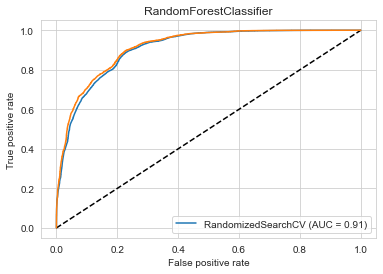

In [89]:
plot_roc_curve(grid,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()